Dataset Preview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2  

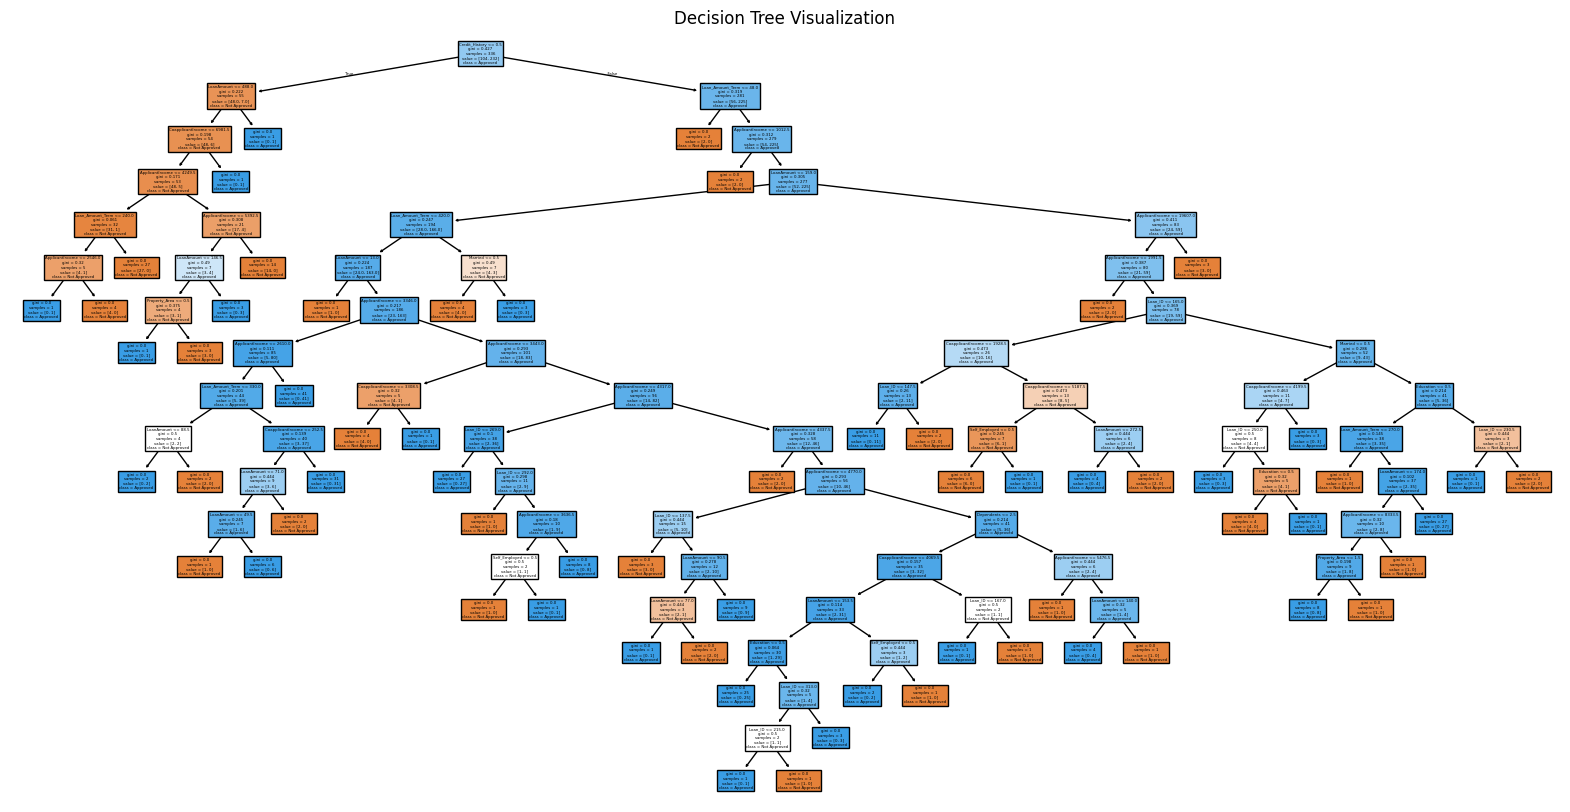

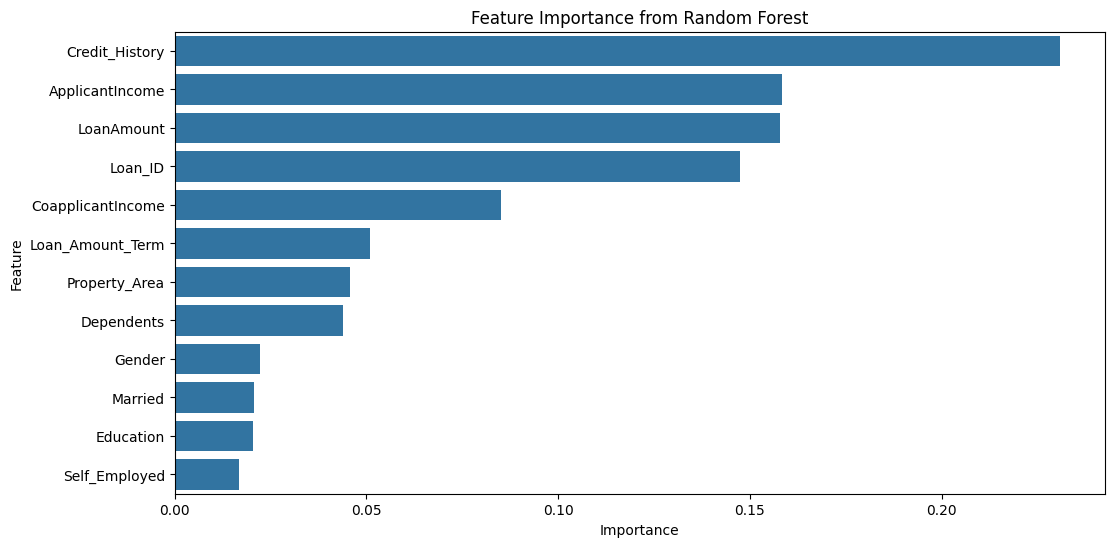

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
# Example: Assuming 'loan_data.csv' where 'Loan_Status' is the target (Y=Approved, N=Not Approved)
df = pd.read_csv('loan_data.csv')

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# 2. Handle missing values (simple fill or drop)
df = df.dropna()  # Or you can use df.fillna(method='ffill') depending on your data

# 3. Encode categorical variables
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 4. Prepare features and labels
X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']               # Target (1=Approved, 0=Not Approved after encoding)

# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# 7. Random Forest Model
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

# 8. Predictions
dtree_preds = dtree.predict(X_test)
rforest_preds = rforest.predict(X_test)

# 9. Evaluation

print("\n--- Decision Tree Performance ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, dtree_preds))
print("Classification Report:\n", classification_report(y_test, dtree_preds))
print("Accuracy Score:", accuracy_score(y_test, dtree_preds))

print("\n--- Random Forest Performance ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, rforest_preds))
print("Classification Report:\n", classification_report(y_test, rforest_preds))
print("Accuracy Score:", accuracy_score(y_test, rforest_preds))

# 10. Visualization of Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# 11. Feature Importance (Random Forest)
importances = rforest.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()
